In [1]:
%matplotlib inline 

from imports import *

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


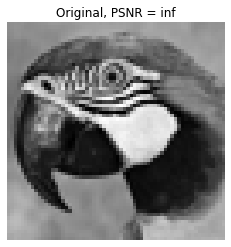

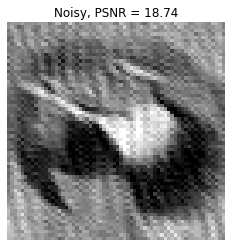

In [47]:
problem = Deblur(img_path='./data/Set12/07.png', kernel_path='./deblurring/kernel.png', H=64, W=64, sigma=1, subsampling=4)
psnr_display(img_path='./data/Set12/07.png', output=problem.original, title="Original", H=64, W=64)

psnr_display(img_path='./data/Set12/07.png', output=problem.noisy, title="Noisy", H=64, W=64)

14042.641346983124
After gradient update: 0 0 18.741776779266843
After denoising update: 0 0 18.741776538439765

After gradient update: 1 0 18.74177653999168
After denoising update: 1 0 18.741776269660193

After gradient update: 2 0 18.741776272882255
After denoising update: 2 0 18.741775973020903

After gradient update: 3 0 18.741775978009947
After denoising update: 3 0 18.741775648935285

After gradient update: 4 0 18.741775655788363
After denoising update: 4 0 18.741775651671148

After gradient update: 5 0 18.741775661203903
After denoising update: 5 0 18.741775630600024

After gradient update: 6 0 18.74177564294958
After denoising update: 6 0 18.7417755867222

After gradient update: 7 0 18.741775602030827
After denoising update: 7 0 18.741775521400225

After gradient update: 8 0 18.74177553980729
After denoising update: 8 0 18.741775436332762

After gradient update: 9 0 18.741775457969037
After denoising update: 9 0 18.74177533352234

After gradient update: 10 0 18.741775358506228


After gradient update: 87 0 18.741759860825532
After denoising update: 87 0 18.74175904610792



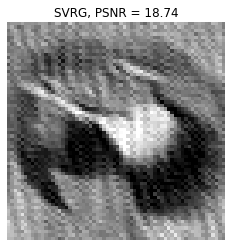

In [51]:
denoiser = NLMDenoiser(filter_decay=0.999,
                       filter_size=0.01, patch_size=5, patch_distance=12, multichannel=True)

L = np.linalg.norm(problem.SCb, 'f')
print(L)

svrg_out, svrg_time, svrg_psnr, svrg_zs = pnp_svrg(problem=problem,
                                                   denoiser=denoiser,
                                                   eta=.0000001, tt=10, T2=1, 
                                                   mini_batch_size=problem.num_meas, verbose=True)

psnr_display(img_path='./data/Set12/07.png', output=svrg_out.reshape(64,64), title="SVRG", H=64, W=64)